En este notebook vamos a ver como el número de casos de COVID corresponde al nivel de movilidad y modelar la relación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures 

Leemos los datos de COVID-19 preprocesados y guardados anteriormente:

In [2]:
covid = pd.read_csv("covid_data.csv")

In [3]:
covid

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,3,H,0-9,2020-01-01,0,0,0,0
1,3,H,10-19,2020-01-01,0,0,0,0
2,3,H,20-29,2020-01-01,0,0,0,0
3,3,H,30-39,2020-01-01,0,0,0,0
4,3,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
579865,49,NC,50-59,2021-01-13,0,0,0,0
579866,49,NC,60-69,2021-01-13,0,0,0,0
579867,49,NC,70-79,2021-01-13,0,0,0,0
579868,49,NC,80+,2021-01-13,0,0,0,0


Añadimos a la tabla una columna con totales de valores en las columnas numéricas para poder eliminar los registros cero.

In [4]:
covid['total']=covid['num_casos']+covid['num_hosp']+covid['num_uci']+covid['num_def']

In [5]:
covid_casos = covid[covid['total']!=0].copy()

In [6]:
covid_casos

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def,total
133,8,M,30-39,2020-01-01,1,0,0,0,1
366,14,H,60-69,2020-01-01,0,1,0,0,1
428,12,H,80+,2020-01-01,0,1,0,0,1
517,17,H,70-79,2020-01-01,0,1,0,0,1
675,23,M,50-59,2020-01-01,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
579468,37,M,80+,2021-01-13,0,1,0,0,1
579570,20,H,0-9,2021-01-13,1,0,0,0,1
579583,20,M,30-39,2021-01-13,1,0,0,0,1
579784,1,H,40-49,2021-01-13,1,0,0,0,1


Vamos a comparar los datos de COVID-19 con datos de movilidad en el mes de noviembre 2020

In [7]:
covid_november = covid_casos[(covid_casos['fecha'] > '2020-10-31') & (covid_casos['fecha'] < '2020-12-01')].groupby(["provincia_iso"]).sum()

In [8]:
covid_november

,num_casos,num_hosp,num_uci,num_def,total
provincia_iso,,,,,
1,2910,148,19,50,3127
2,3348,256,41,43,3688
3,12879,1099,106,231,14315
4,6123,344,74,65,6606
5,1244,127,7,38,1416
6,5565,447,55,142,6209
7,5686,367,59,42,6154
8,48171,2712,191,490,51564
9,7552,736,59,166,8513


In [9]:
covid_november['provincia'] = covid_november.index

In [10]:
covid_november

,num_casos,num_hosp,num_uci,num_def,total,provincia
provincia_iso,,,,,,
1,2910,148,19,50,3127,1
2,3348,256,41,43,3688,2
3,12879,1099,106,231,14315,3
4,6123,344,74,65,6606,4
5,1244,127,7,38,1416,5
6,5565,447,55,142,6209,6
7,5686,367,59,42,6154,7
8,48171,2712,191,490,51564,8
9,7552,736,59,166,8513,9


Leemos los datos de movilidad de noviembre, calculamos la movilidad media para cada provincia y añadímosla a la tabla con datos de COVID. 

In [11]:
mov_november = pd.read_csv('noviembre/noviembre.csv')

In [12]:
mov_november

,periodo,fecha,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,52
0,0,20201101,44009.233,66707.543,361994.944,149279.415,27741.731,155114.100,207762.892,696391.452,...,106642.008,27678.777,177573.555,482561.611,68242.283,113818.941,49181.597,133223.287,8397.566,6416.381
1,1,20201101,21946.849,51087.419,244558.302,115247.041,22200.664,104260.251,144920.987,550648.735,...,96631.094,18393.460,125506.316,331420.503,57111.487,79985.089,30491.251,103527.734,6297.690,5080.921
2,2,20201101,27683.553,37021.849,199920.915,99688.365,26861.659,86628.748,132100.399,463969.333,...,77013.906,10907.111,107668.036,299476.231,51941.894,73594.656,26022.349,108130.484,5086.132,4097.042
3,3,20201101,18411.288,35739.796,195333.355,116754.316,24939.622,73980.815,150316.996,446483.385,...,89518.161,11175.811,103717.138,293120.115,52317.501,66219.218,28030.817,100877.760,4573.465,3195.614
4,4,20201101,21783.837,46900.346,222614.501,129583.194,14789.286,80979.431,150228.550,576288.406,...,98815.542,20096.121,134558.367,366173.513,54173.681,87017.482,35273.868,117673.175,4763.171,3593.594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19,20201130,252465.714,417537.970,1767450.360,695761.121,128830.008,787578.023,1027230.916,4827388.487,...,698631.159,148649.382,859437.669,2430004.391,463490.692,771027.986,315518.547,923205.006,33080.184,22835.211
716,20,20201130,222476.879,326165.573,1367525.670,563738.242,103937.248,588347.741,770921.814,4203130.064,...,553674.889,81031.556,662009.953,2013075.573,379968.970,658711.657,199307.355,820652.529,28087.800,21687.251
717,21,20201130,203834.037,204106.849,986590.410,524365.652,70236.439,471423.977,602944.862,3204384.373,...,424448.507,79939.069,550954.411,1576266.110,316424.010,515466.144,157269.365,639736.843,25297.148,16195.649
718,22,20201130,122005.951,140973.214,718019.963,379286.587,49661.961,283632.955,376918.584,1865581.042,...,258371.970,54115.190,397864.247,1113525.857,173028.736,255780.626,112884.229,507229.307,14145.208,9296.689


In [13]:
mov_nov = pd.DataFrame(mov_november.mean()[2:])
mov_nov

,0
1,2.274163e+05
2,3.892616e+05
3,1.407775e+06
4,6.053898e+05
5,1.305257e+05
6,6.462736e+05
7,8.796263e+05
8,3.272368e+06
9,3.012158e+05
10,4.366293e+05


In [14]:
movilidad = []
for i in range(len(covid_november['provincia'])):
    prov = np.array(covid_november['provincia'])[i]
    mov = mov_nov[mov_nov.index==str(prov)].iloc[0,0]
    movilidad.append(mov)

In [15]:
covid_november_mov = covid_november.copy()
covid_november_mov['movilidad']=movilidad

In [16]:
covid_november_mov.sort_values('movilidad', ascending=False)

,num_casos,num_hosp,num_uci,num_def,total,provincia,movilidad
provincia_iso,,,,,,,
28,38322,2457,122,648,41549,28,4.847421e+06
8,48171,2712,191,490,51564,8,3.272368e+06
46,20965,1818,186,270,23239,46,2.057244e+06
3,12879,1099,106,231,14315,3,1.407775e+06
30,15549,1318,171,269,17307,30,1.272892e+06
41,17874,1350,157,397,19778,41,1.223530e+06
29,9864,843,66,198,10971,29,1.064995e+06
15,5845,543,87,112,6587,15,9.519100e+05
35,958,80,19,12,1069,35,9.288121e+05


Visualizamos número de casos de COVID en relación con nivel de movilidad: 1) número de casos registrados; 2) número de hospitalizaciones; 3) número de pacientes en UCI; 4) número de defunciones

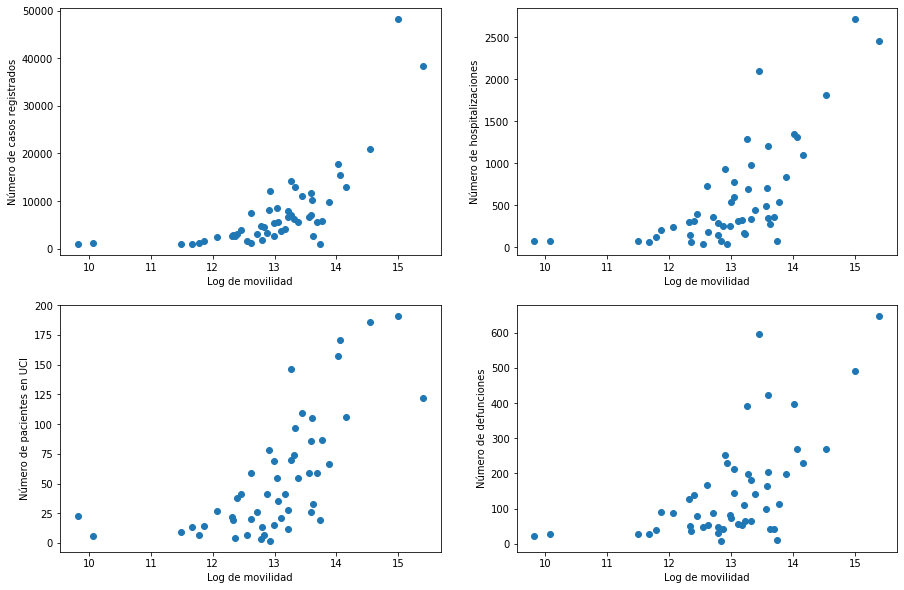

In [17]:
data = covid_november_mov
X=np.log(data['movilidad'])
Y1=data['num_casos']
Y2=data['num_hosp']
Y3=data['num_uci']
Y4=data['num_def']

f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(221)
ax1 = plt.scatter(X,Y1);
plt.xlabel('Log de movilidad')
plt.ylabel('Número de casos registrados')
ax2 = f.add_subplot(222)
ax2 = plt.scatter(X, Y2);
plt.xlabel('Log de movilidad')
plt.ylabel('Número de hospitalizaciones')
ax3 = f.add_subplot(223)
ax3 = plt.scatter(X,Y3);
plt.xlabel('Log de movilidad')
plt.ylabel('Número de pacientes en UCI')
ax4 = f.add_subplot(224)
ax4 = plt.scatter(X,Y4);
plt.xlabel('Log de movilidad')
plt.ylabel('Número de defunciones');

Es obvio que los niveles más altos de movilidad corresponden al mayor número de casos de COVID-19.

Intentamos a modelar la relación entre movilidad y número de casos registrados utilizando la regresión lineal con un elemento polinomio.

In [18]:
X = np.array(covid_november_mov['movilidad']).reshape(-1,1)
Y = np.array(covid_november_mov['num_casos']).reshape(-1,1)

In [19]:
degree=2
scaler = StandardScaler()
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression(),  verbose=True)

In [20]:
polyreg_scaled.fit(X, Y)

[Pipeline]  (step 1 of 3) Processing polynomialfeatures, total=   0.0s
[Pipeline] .... (step 2 of 3) Processing standardscaler, total=   0.0s
[Pipeline] .. (step 3 of 3) Processing linearregression, total=   0.0s


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=True)

Los coeficientes de la regresión:

In [21]:
polyreg_scaled.named_steps['linearregression'].coef_

array([[    0.        , 10356.08724238, -2841.82515294]])

In [22]:
polyreg_scaled.named_steps['linearregression'].intercept_

array([7612.84313725])

Vamos a calcular el número de casos predichos por el modelo y el error del modelo:

In [23]:
y_pred = polyreg_scaled.predict(X)

mae = mean_absolute_error(Y, y_pred)
mae

2503.8044511908683

In [24]:
Y.mean()

7612.843137254902

In [25]:
Y.std()

8628.922772321479

Vemos que el error del modelo es aproximadamente un tercio de la desviación estandar de la variable, que no está mal.

Visualizamos los valores proporcionados por el modelo junto con los valores actuales:

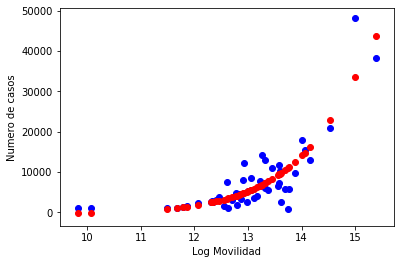

In [26]:
plt.scatter(np.log(X), Y, c='blue');
plt.scatter(np.log(X), y_pred, c='red');
plt.xlabel('Log Movilidad')
plt.ylabel('Numero de casos');

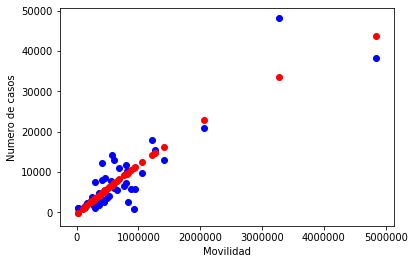

In [27]:
plt.scatter(X, Y, c='blue');
plt.scatter(X, y_pred, c='red');
plt.xlabel('Movilidad')
plt.ylabel('Numero de casos');